In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
# Download de recursos do NLTK
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Importando dataset
df = pd.read_csv("C:\\Users\\User\\Desktop\\VsCode\\My\\NLPMedidosDeSentimentos\\texto_base.csv", sep=",", encoding="utf8")

In [4]:
# Removendo colunas desnecessárias e criando uma nova coluna
df.drop(columns=['id', 'text_en'], axis=1, inplace=True)
df['classification'] = df["sentiment"].replace(["neg", "pos"], [0, 1])

C:\Users\User\AppData\Local\Temp\ipykernel_1472\1196362173.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['classification'] = df["sentiment"].replace(["neg", "pos"], [0, 1])


In [5]:
# Convertendo texto para minúsculas
df['text_pt'] = df['text_pt'].str.lower()

In [6]:
# Importando stemmer e stopwords
stemmer = nltk.stem.RSLPStemmer()
stop_words = set(nltk.corpus.stopwords.words('portuguese'))

In [7]:
# Função para pré-processamento de texto
def preprocess_text(text):
    # Remover brackets
    text = re.sub(r'[\[\]]', '', text)
    # Tokenização e stemming
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(stemmed_tokens)

In [8]:
# Aplicar pré-processamento de texto ao DataFrame
df['text_pt'] = df['text_pt'].apply(preprocess_text)

In [9]:
# Criando o vetorizador
cv = CountVectorizer(lowercase=True, stop_words=None, ngram_range=(1, 2), tokenizer=RegexpTokenizer(r'[a-zA-Z0-9]+').tokenize)

In [10]:
# Criando a matriz sparse da representação da coluna 'text_pt'
text_counts = cv.fit_transform(df['text_pt'])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['classification'], test_size=0.34, random_state=1, shuffle=True)

In [12]:
# Criando e treinando o modelo
clf = MultinomialNB().fit(X_train, y_train)

In [13]:
# Fazendo previsões e avaliando a acurácia do modelo
y_predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, y_predicted))

MultinomialNB Accuracy: 0.9161098737936154


In [14]:
# Lendo o texto de teste
with open('C:\\Users\\user\\Desktop\\VsCode\\0Deep_Learning\\6 - Processamento de Linguagem Natural\\texto_teste.txt', 'r', encoding='utf-8') as file_teste:
    text = file_teste.read()

In [15]:
# Separando por frases
phrases = text.split('.')

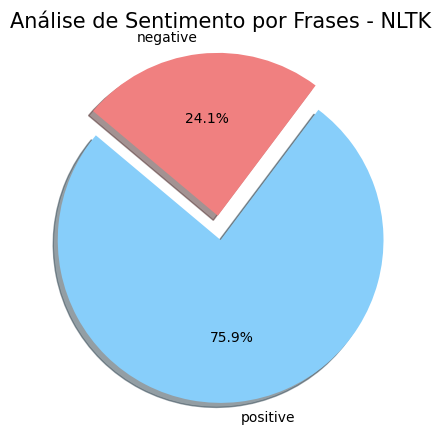

Quantidade por frases: 28
Quantidade de frases positivas: 22
Quantidade de frases negativas: 7


In [18]:
# Contagem de frases positivas e negativas
pos, neg = 0, 0
for phrase in phrases:
    processed_phrase = preprocess_text(phrase)
    value_trans = cv.transform([processed_phrase])
    predict_phrase = clf.predict(value_trans)
    if predict_phrase == 0:
        neg += 1
    else:
        pos += 1

# Criando DataFrame com resultados
df_result = pd.DataFrame({'positive': [pos], 'negative': [neg]})

# Gerando o gráfico
labels = df_result.columns.tolist()
sizes = df_result.values.tolist()[0]
color = ['lightskyblue', 'lightcoral']
explode = (0.15, 0)

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=140, colors=color)

ax1.set_title('Análise de Sentimento por Frases - NLTK', fontsize=15)
ax1.axis('equal')
plt.show()

# Exibindo informações adicionais
print("Quantidade por frases: {}".format(len(phrases) - 1))
print("Quantidade de frases positivas: {}".format(pos))
print("Quantidade de frases negativas: {}".format(neg))